In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set a professional style for all plots
plt.style.use('ggplot')

In [2]:
# Create the directory for saving plot images
os.makedirs('outputs', exist_ok=True)
print("Directory 'outputs/' is ready.")

Directory 'outputs/' is ready.


In [3]:
try:
    sentiment_df = pd.read_csv('/content/bitcoin_sentiment.csv')
    trader_df = pd.read_csv('/content/trader_data.csv')
    print("Datasets loaded successfully.")

    # Optional: Display the first few rows to verify
    print("\n--- Sentiment Data Head ---")
    display(sentiment_df.head())
    print("\n--- Trader Data Head ---")
    display(trader_df.head())

except FileNotFoundError:
    print("\nERROR: Make sure you have uploaded 'bitcoin_sentiment.csv' and 'trader_data.csv' to the Colab session.")


Datasets loaded successfully.

--- Sentiment Data Head ---


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



--- Trader Data Head ---


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
# Convert date and time columns to the correct datetime format for analysis.
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])

# Create a clean date column in the trader data for later use.
trader_df['trade_date'] = trader_df['Timestamp'].dt.normalize()

# Ensure data integrity by handling any potential missing values in the crucial 'Closed PnL' column.
trader_df.dropna(subset=['Closed PnL'], inplace=True)
print("\nData cleaning and preprocessing complete.")



Data cleaning and preprocessing complete.



Sentiment Analysis Period: 2018-02-01 to 2025-05-02

Sentiment Distribution (Number of Days):
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


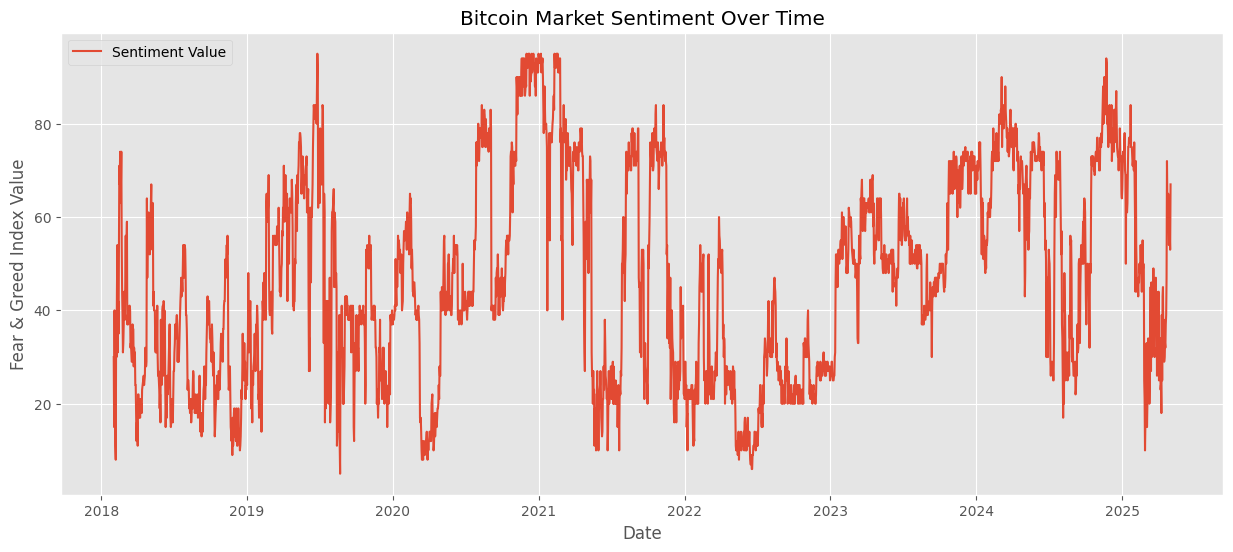

In [5]:


# Describe the analysis period.
sentiment_start = sentiment_df['date'].min().date()
sentiment_end = sentiment_df['date'].max().date()
print(f"\nSentiment Analysis Period: {sentiment_start} to {sentiment_end}")

# Show sentiment distribution counts.
sentiment_counts = sentiment_df['classification'].value_counts()
print("\nSentiment Distribution (Number of Days):")
print(sentiment_counts)

# Plot sentiment value over time and save the figure.
plt.figure(figsize=(15, 6))
plt.plot(sentiment_df['date'], sentiment_df['value'], label='Sentiment Value')
plt.title('Bitcoin Market Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Fear & Greed Index Value')
plt.legend()
plt.savefig('outputs/sentiment_over_time.png') # Save the plot to the 'outputs' folder.
plt.show()



Trader Analysis Period: 1970-01-01 to 1970-01-01

Overall Win Rate: 41.13%

Summary of Closed PnL per Trade:
count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: Closed PnL, dtype: float64

Top 10 Most Profitable Trader Accounts:
Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713    4.165419e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    4.030115e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    3.790954e+05
Name: Closed PnL, dtype: float64


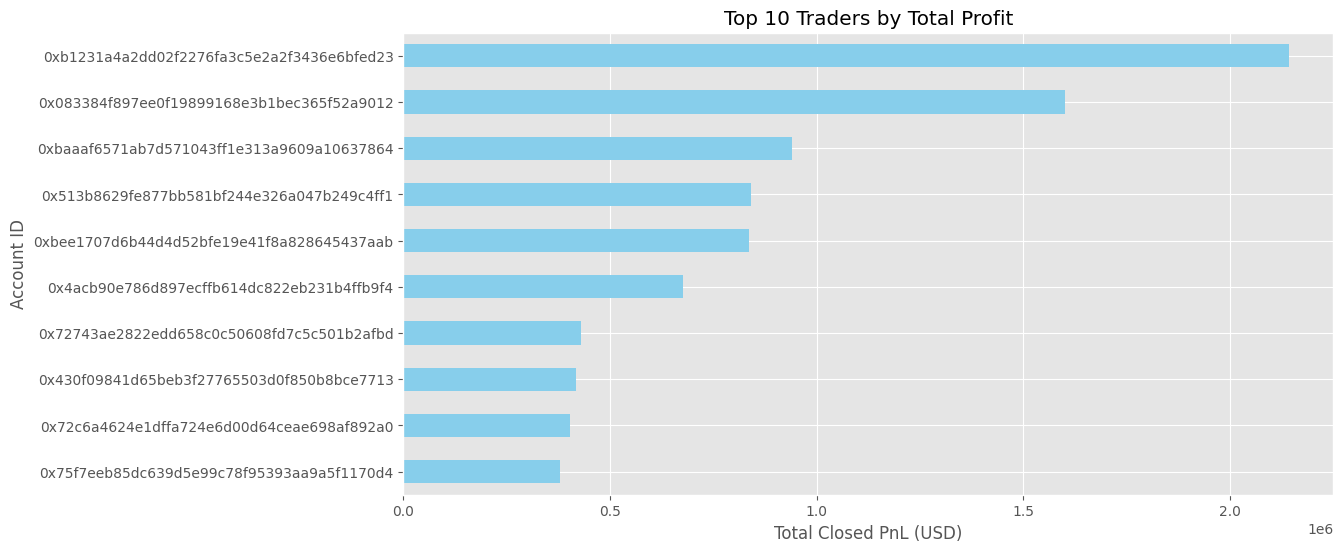


--- Analysis complete. All plots have been saved to the 'outputs' folder. ---


In [6]:


# Describe the analysis period.
trader_start = trader_df['trade_date'].min().date()
trader_end = trader_df['trade_date'].max().date()
print(f"\nTrader Analysis Period: {trader_start} to {trader_end}")

# Calculate and print the overall win rate.
trader_df['is_profitable'] = trader_df['Closed PnL'] > 0
overall_win_rate = trader_df['is_profitable'].mean() * 100
print(f"\nOverall Win Rate: {overall_win_rate:.2f}%")

# Show PnL summary statistics.
print("\nSummary of Closed PnL per Trade:")
print(trader_df['Closed PnL'].describe())

# Show and plot top 10 traders by total profit.
top_traders = trader_df.groupby('Account')['Closed PnL'].sum().nlargest(10)
print("\nTop 10 Most Profitable Trader Accounts:")
print(top_traders)

# Plot the top traders and save the figure.
plt.figure(figsize=(12, 6))
top_traders.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Traders by Total Profit')
plt.xlabel('Total Closed PnL (USD)')
plt.ylabel('Account ID')
plt.savefig('outputs/top_10_traders.png') # Save the plot to the 'outputs' folder.
plt.show()

print("\n--- Analysis complete. All plots have been saved to the 'outputs' folder. ---")